In [30]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor

# Loading your IBM Quantum account(s)
API_KEY = "fd386c9845f1931c636bff10a0f27322bd91aeca18d7716ac282c7d88e4f51a2345295d5073af63a514eabf627196edd06d60cc18892603106dc51570f042bb5"
IBMQ.save_account('API_KEY', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_manila')


ibmqfactory.load_account:WARNING:2022-01-15 16:24:40,456: Credentials are already in use. The existing account in the session will be replaced.


In [31]:
def createEntangled():
    es = QuantumCircuit(2)
    es.h(1)
    es.cx(1, 0)
    return es

In [32]:
def decode(de):
    de.cx(1,0)
    de.h(1)
    return de

In [36]:
def encode(sdc,msg):
    if msg == "00":
        return sdc
    elif msg == "01":
        sdc.z(1)
        return sdc
    elif msg == "10":
        sdc.x(1)
        return sdc
    else :
        sdc.y(1)
        return sdc
    

In [37]:
def misurazioniSim(sdc):
    aer_sim = Aer.get_backend('aer_simulator')
    result = aer_sim.run(sdc).result()
    counts = result.get_counts(sdc)
    print(counts)
    plot_histogram(counts)

In [38]:
def misurazioniReal(sdc):
    job = execute(sdc,backend = device,shots = 1024)
    print(job.job_id())
    job_monitor(job)
    device_result = job.result().get_counts()
    plot_histogram(device_result)

    

In [28]:
#Alice vuole mandare i bit 00 a Bob
sdc = createEntangled()
sdc = encode(sdc,"00") #Alice invia
sdc = decode(sdc) #Bob riceve
#misurazioniSim(sdc)
misurazioniReal(sdc)

61e2f4dc7d229f3cf1c7d55c
Job Status: job is queued (4)     

KeyboardInterrupt: 

61e2f5dca90e533d337361cd
Job Status: job has successfully run
Traceback (most recent call last):
  Input In [39] in <module>
    misurazioniReal(sdc)
  Input In [38] in misurazioniReal
    plot_histogram(device_result.get_counts(sdc))
  File /opt/conda/lib/python3.8/site-packages/qiskit/visualization/counts_visualization.py:222 in plot_histogram
    ax.set_ylim([0.0, min([1.2, max(1.2 * val for val in all_vals)])])
ValueError: max() arg is an empty sequence

Use %tb to get the full traceback.


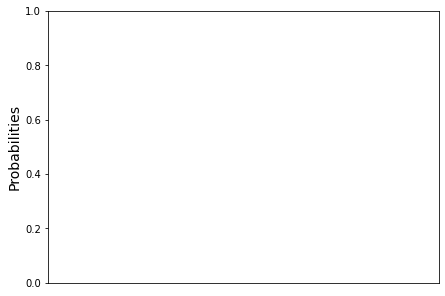

In [39]:
#Alice vuole mandare i bit 01 a Bob
sdc = createEntangled()
sdc = encode(sdc,"01") #Alice invia
sdc = decode(sdc) #Bob riceve
#misurazioniSim(sdc)
misurazioniReal(sdc)

In [ ]:
#Alice vuole mandare i bit 01 a Bob
sdc = createEntangled()
sdc = encode(sdc,"10") #Alice invia
sdc = decode(sdc) #Bob riceve
#misurazioniSim(sdc)
misurazioniReal(sdc)

In [ ]:
#Alice vuole mandare i bit 01 a Bob
sdc = createEntangled()
sdc = encode(sdc,"11") #Alice invia
sdc = decode(sdc) #Bob riceve
#misurazioniSim(sdc)
misurazioniReal(sdc)